In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('HURdat_ExtremeWeatherEvents.csv')
data = data[list(data.columns)[1:]]

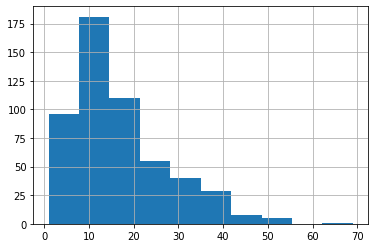

In [40]:
# Histogram of observations per storm 
data.groupby('ID')['ID'].count().hist()

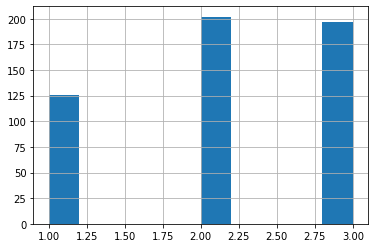

In [50]:
# Histogram of observations per storm 
id_to_status = data.groupby('ID')['Status'].describe()['unique']
id_to_status.hist()

In [32]:
def shift_to_next_timestep(data, col, new_col=None, group_col='ID'):

    if not new_col:
        new_col = '{}_p'.format(col)
        
    # Make new column
    data[new_col] = None

    for group in data[group_col].unique():
       
        group_idx = data[data['ID']==group].index
        seq_idx = data.loc[i_idx, 'i']

        for seq_id, group_id in zip(seq_idx, group_idx):
            
            # Next row of df
            next_id = group_id + 1
            
            try:
                # Get next sequence id 
                next_seq_id = data.loc[next_id]['i']
                
                # If group ID on next row is different, don't shift the value
                if data.loc[next_id, group_col] != group:
                    continue
                
                # Check if next_i value is +1 of current i
                if next_seq_id == seq_id + 1:
                    data.loc[next_id, new_col] = data.loc[group_id, col] 

            except KeyError:
                continue

    return data

In [33]:
xdata = shift_to_next_timestep(data, 'i')

In [30]:
xdata[['ID', 'i', 'Maximum.Wind', 'Maximum.Wind_p']]

,ID,i,Maximum.Wind,Maximum.Wind_p
0,AL011980,1,20,None
1,AL011980,2,25,20
2,AL011980,3,25,25
3,AL011980,4,25,25
4,AL011980,5,25,25
5,AL011980,6,25,25
6,AL011980,7,20,25
7,AL011980,10,20,None
8,AL011980,11,25,20
9,AL011980,12,25,25
